# Data Science Regression Project: Predicting Home Prices in Banglore

---

## Data Cleaning (Real Estate Price Prediction Project)

---

In [49]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
from matplotlib import pyplot as plt # type: ignore
%matplotlib inline
import matplotlib # type: ignore
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [50]:
df1 = pd.read_csv("C://Users//mehmo//Downloads//Machine Learnig Course//Project 1//Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [51]:
df1.shape

(13320, 9)

In [52]:
df1.groupby('area_type').area_type.count() #grouping the data by area type 

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [53]:
df2 = df1.drop(['area_type', 'society', 'balcony'], axis='columns') #dropping the columns which are not required
df2.head()

,availability,location,size,total_sqft,bath,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [54]:
df2.isnull().sum() #tell you no of rows that have missing values
# you can also use the median method to handle these null values 

availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [55]:
df3 = df2.dropna()
df3.isnull().sum() #tell you no of rows that have missing values

availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

In [56]:
df3['size'].unique() #to know the unique values in the size column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [57]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) #creating a new column BHK, x take the column values and split into 2 tokens and take the first token

C:\Users\mehmo\AppData\Local\Temp\ipykernel_8688\1506808188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) #creating a new column BHK, x take the column values and split into 2 tokens and take the first token


In [58]:
df3.head()

,availability,location,size,total_sqft,bath,price,BHK
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


In [59]:
df3['BHK'].unique() # checking the unique value in the BHK column

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [60]:
df3[df3.BHK>20] #to know the values that are greater than 20    

,availability,location,size,total_sqft,bath,price,BHK
1718,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [61]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [62]:
def is_float(x):
    try :
        float(x)
        return True
    except:
        return False

In [63]:
df3[-df3['total_sqft'].apply(is_float)].head(10) # we have to find those values that lies in range format so we can convert them into float
# also if we see some more data that data is not consistent some values have string in it

,availability,location,size,total_sqft,bath,price,BHK
30,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Ready To Move,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Ready To Move,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,18-Mar,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [64]:
def range_to_float(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [65]:
range_to_float('266-100')

183.0

In [66]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(range_to_float)
df4.head()

,availability,location,size,total_sqft,bath,price,BHK
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [67]:
df4[-df4['total_sqft'].apply(is_float)].head(10)

,availability,location,size,total_sqft,bath,price,BHK


In [68]:
df4.loc[30] #to know the values at 30th index, the average values of the range 2100 - 2850 has been placed here

availability       19-Dec
location        Yelahanka
size                4 BHK
total_sqft         2475.0
bath                  4.0
price               186.0
BHK                     4
Name: 30, dtype: object

In [69]:
(2100+2850)/2

2475.0

---

## Feature Engineering (Real Estate Price Prediction)

---

In [70]:
df4.head()

,availability,location,size,total_sqft,bath,price,BHK
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [71]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] # price is in lac rupees so we have to convert it into rupees
df5.head()

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [72]:
len(df5.location.unique()) # dimentionality curse will happen if we try to convert all these location values to numbers with one hot encoding

1304

In [73]:
df5['location'] = df5['location'].apply(lambda x: x.strip()) # it removes leading/ending and trailing characters from a string.
location_stats = df5.groupby('location')['location'].count().sort_values(ascending=False) # use count() instead of sum()
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [74]:
len(location_stats[location_stats<=10]) # type: ignore # to know the location that have less than 10 data points

1052

### Dimensionality Reduction

In [75]:
location_stat_less_than_10 = location_stats[location_stats<=10]
location_stat_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [76]:
len(df5.location.unique())

1293

In [77]:
df5.location = df5.location.apply(lambda x: 'others' if x in location_stat_less_than_10 else x)
# values with less than 10 data points are replaced with others category

In [78]:
len(df5.location.unique())

242

In [79]:
df5.head(10)

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Ready To Move,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,18-May,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Ready To Move,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Ready To Move,others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


---

## Outlier Removal (Real Estate Price Prediction Project)

---

In [80]:
1020/6 # as in the lower dataframes you can see having 6 room, one with area 170 sqft seems absurd

170.0

In [81]:
# normally an average room has the size of 300 sqft so we have to remove those values that seems to be outliers

df5[df5.total_sqft/df5.BHK<=300].head()

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,Ready To Move,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Ready To Move,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Ready To Move,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [82]:
len(df5[df5.total_sqft/df5.BHK<=300])

926

In [83]:
df5.shape

(13246, 8)

In [84]:
df6 = df5[df5.total_sqft/df5.BHK<=300]
df6 = df5.drop(df6.index)

In [85]:
df6.shape

(12320, 8)

### Outlier Removal Using Standard Deviation and Mean

In [86]:
df6.price_per_sqft.describe() 
# as you can see in the minimun value, that is unlikely to have 267 Rs per sqft in banglore
# same as that max price is also unlikey to have 12000000 Rs per sqft

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [87]:
def remove_pps_outliers(df): # remove prices per sqft outliers
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft) # standard deviation
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.head()

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,20-May,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,18-Jun,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,15-Dec,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,18-Jun,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [88]:
df7.shape

(10016, 8)

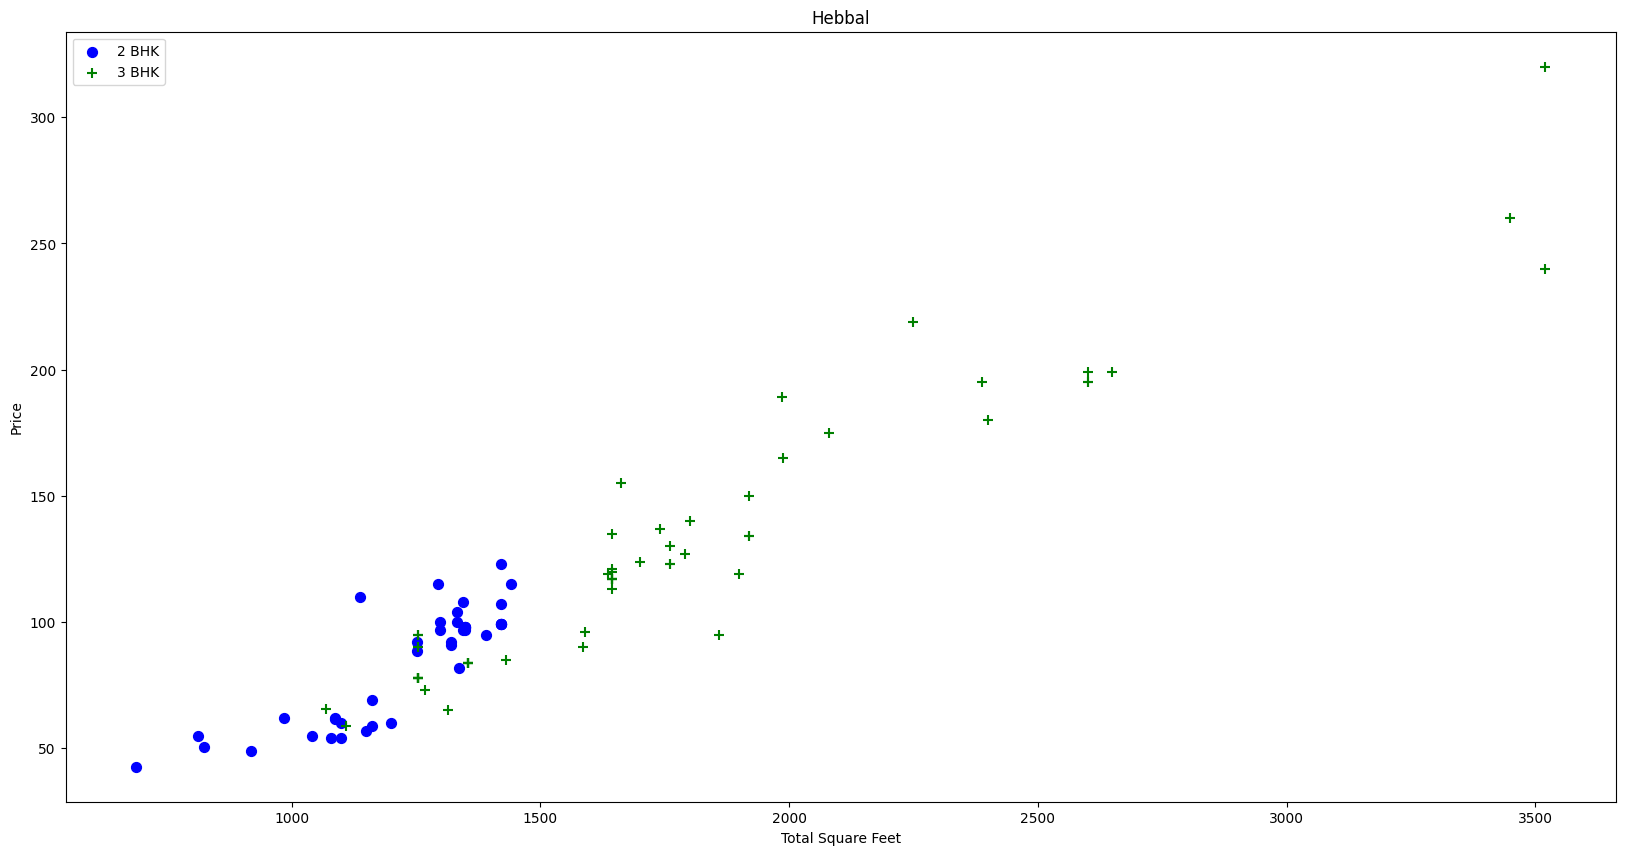

In [162]:
def plot_scatter_chart (df, location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', label='3 BHK', s=50, marker='+')
    plt.xlabel('Total Square Feet')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()
    
plot_scatter_chart(df7, 'Hebbal')

# at some places 3 BHK has less price than 2 BHK so we have to remove these outliers

In [90]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

# we have to remove those 2 BHK whose price is less than 1 BHK in the same location, so this function will remove those datapoints 
# where mean value for 2 BHK is less than 1 BHK

df8 = remove_bhk_outliers(df7)
df8.shape # we have removed 3000 rows

(7164, 8)

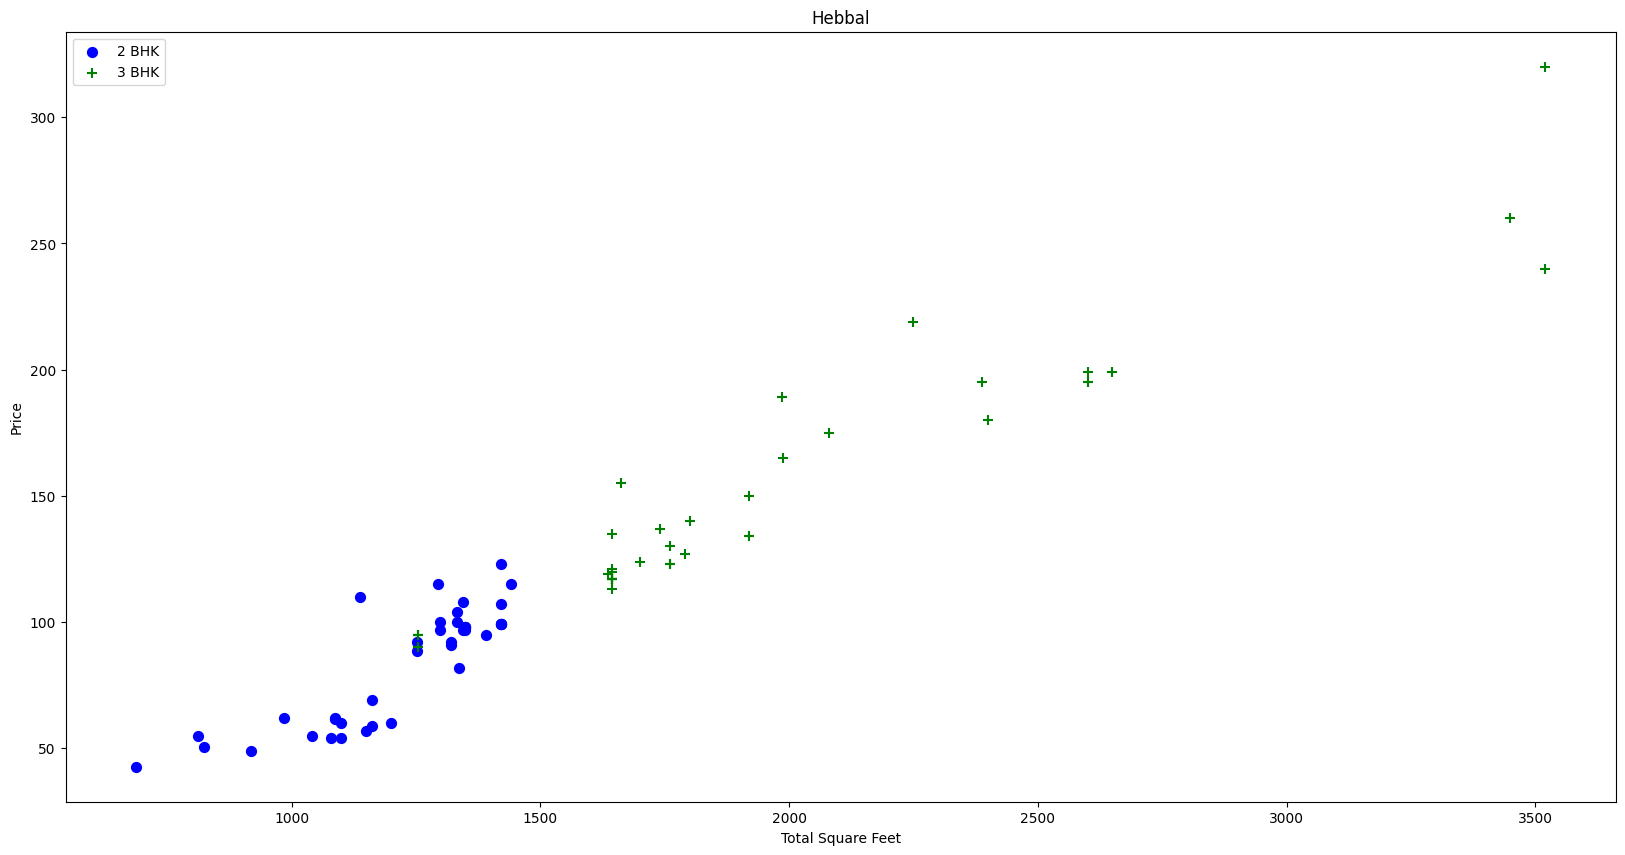

In [91]:
plot_scatter_chart(df8, 'Hebbal') # majority of datapoints with 3 bedrooms have higher price than 2 bedrooms

Text(0, 0.5, 'Count')

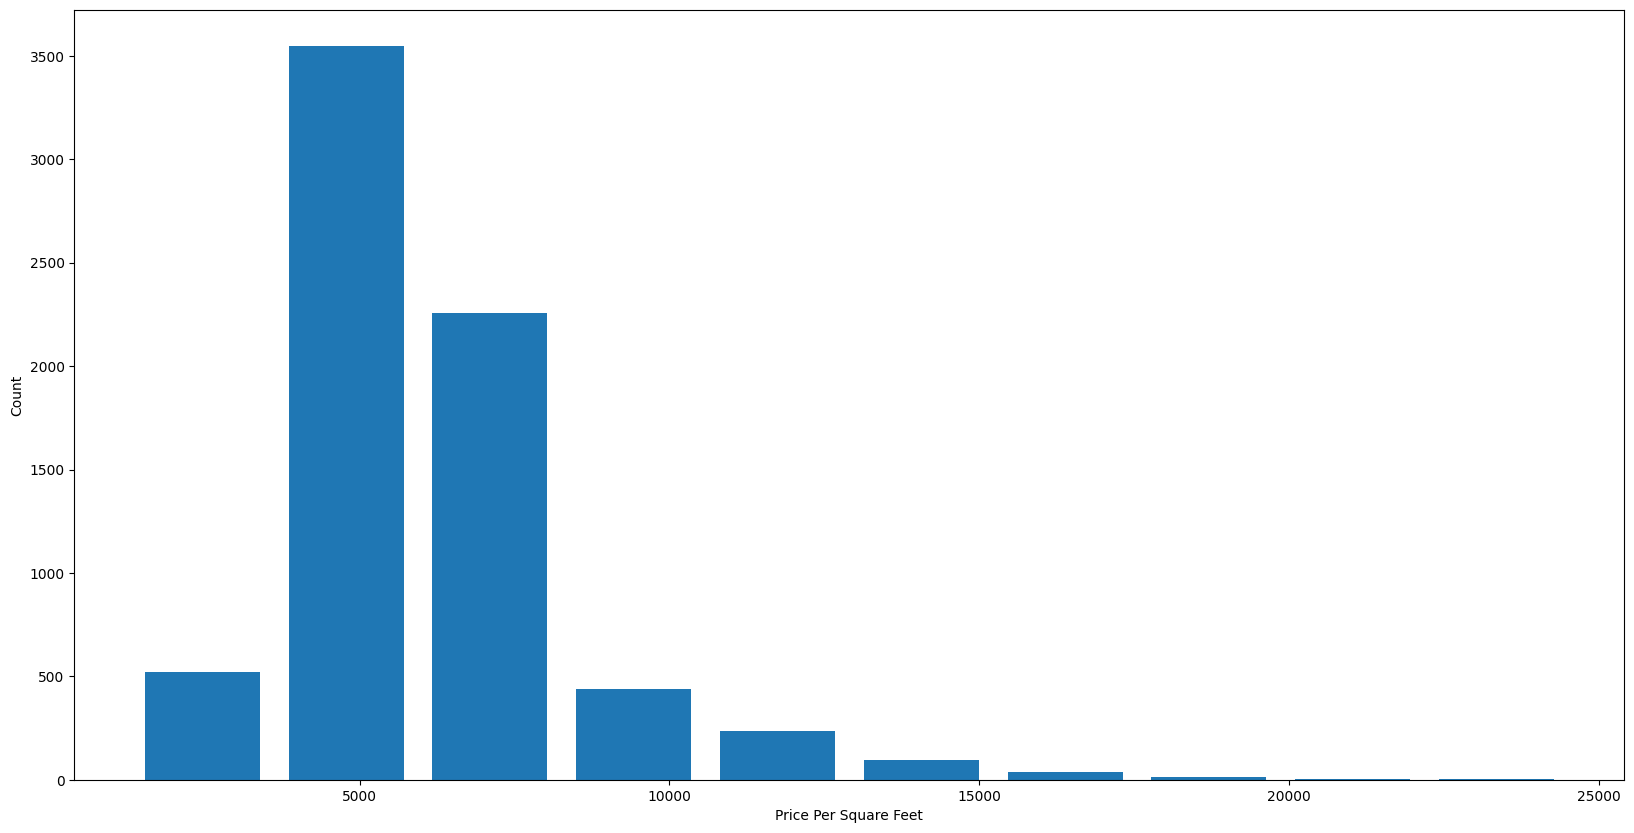

In [92]:
import matplotlib # type: ignore
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
LABEL_PRICE_PER_SQFT = 'Price Per Square Feet'
plt.xlabel(LABEL_PRICE_PER_SQFT)
plt.ylabel('Count')

In [93]:
df8.head()

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,20-May,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,18-Jun,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,15-Dec,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,18-Jun,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


### Outlier Removal Using Bathrooms Feature

In [94]:
df8.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [95]:
df8[df8.bath>10] # we have to remove those datapoints where number of bathrooms are more than number of bedrooms + 2

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
5138,Ready To Move,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8307,Ready To Move,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8392,Ready To Move,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9106,Ready To Move,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9431,Ready To Move,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

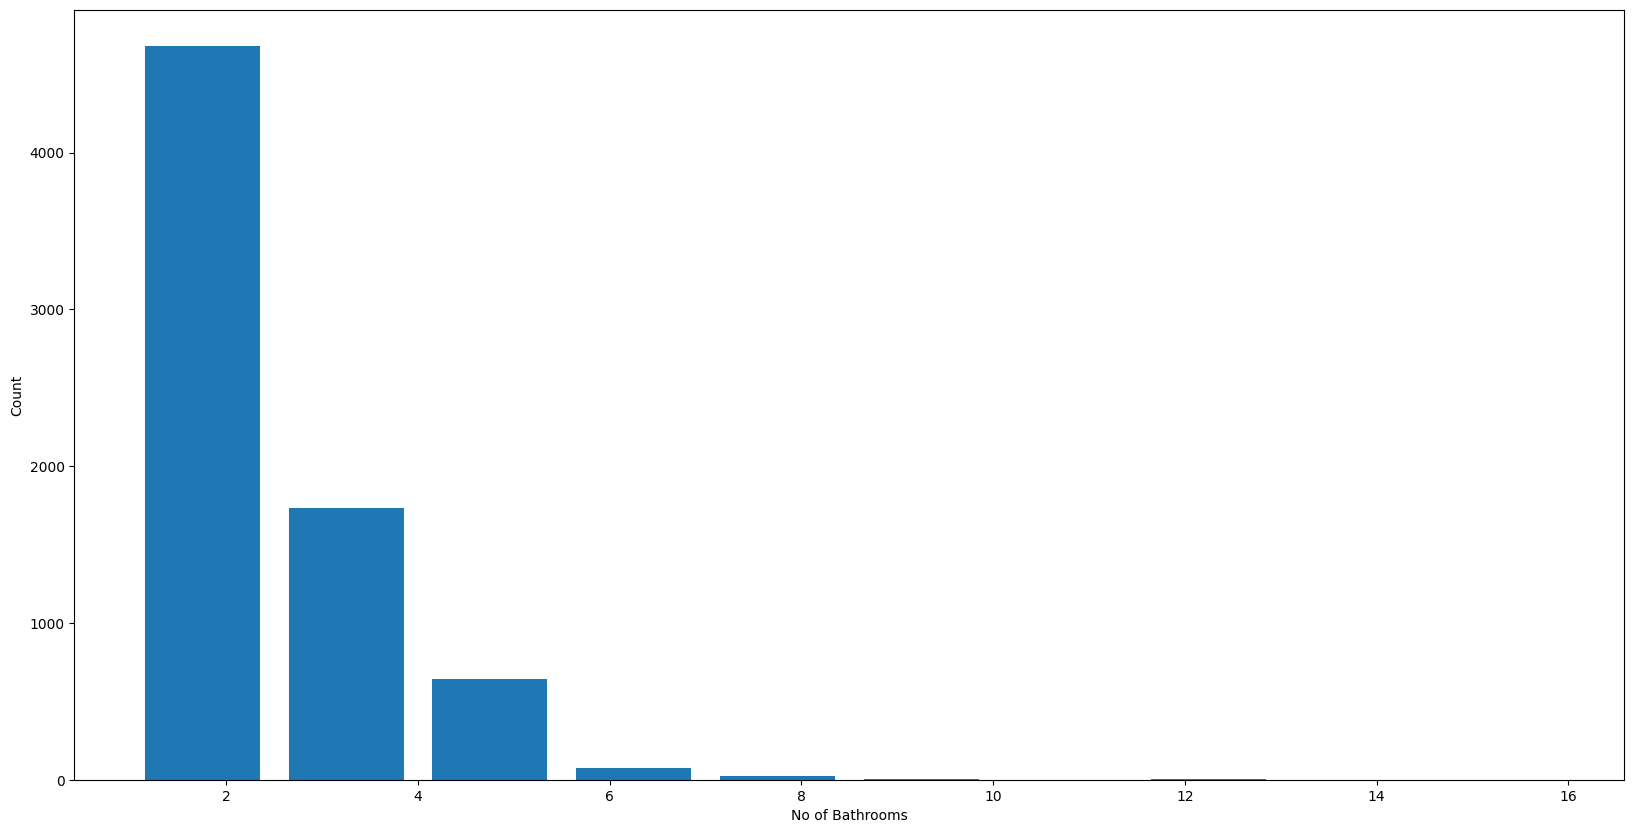

In [96]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('No of Bathrooms')
plt.ylabel('Count')

In [104]:
df8[df8.bath-2>df8.BHK] # we have removed those outliers where number of bathrooms are more than number of bedrooms + 2

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
1565,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5099,Ready To Move,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6562,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8232,Ready To Move,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [105]:
df9 = df8[df8.bath<df8.BHK+2]
df9.shape # we have removed those outliers where number of bathrooms are less than number of bedrooms + 2

(7088, 8)

In [106]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head()

,availability,location,total_sqft,bath,price,BHK
0,20-May,1st Block Jayanagar,2850.0,4.0,428.0,4
1,18-Jun,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Ready To Move,1st Block Jayanagar,1875.0,2.0,235.0,3
3,15-Dec,1st Block Jayanagar,1200.0,2.0,130.0,3
4,18-Jun,1st Block Jayanagar,1235.0,2.0,148.0,2


---

## Model Building (Real Estate Price Prediction Project)

---

### Use One Hot Encoding For Location

In [118]:
dummies = pd.get_dummies(df10.location, dtype=int) # it will convert the location into one hot encoding
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
df11 = pd.concat([df10, dummies.drop('others', axis='columns')], axis='columns') # we have to drop one column to avoid dummy variable trap
df11.head()

,availability,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,20-May,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18-Jun,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ready To Move,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Dec,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18-Jun,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Build a Model Now

In [136]:
df12 = df11.drop(['location', 'availability'], axis='columns')
df12.head(2)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df12.shape

(7088, 245)

In [138]:
X = df12.drop('price', axis='columns')
y = df12.price

In [139]:
X.head(3)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [141]:
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [142]:
from sklearn.linear_model import LinearRegression # type: ignore
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8751466170465758

### K Fold cross validation to measure accuracy of our LinearRegression model

In [143]:
from sklearn.model_selection import ShuffleSplit # type: ignore
from sklearn.model_selection import cross_val_score # type: ignore

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)  # ShuffleSplit is used to shuffle the data, so reach set has equal distribution 
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86195477, 0.86419585, 0.82068946, 0.82709117, 0.89136565])

### Find best model using GridSearchCV

In [152]:
from sklearn.model_selection import GridSearchCV # type: ignore
from sklearn.linear_model import Lasso # type: ignore
from sklearn.tree import DecisionTreeRegressor # type: ignore

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {

            }
        },
        'lasso': {
            'model': Lasso(random_state=0),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(random_state=0),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_pa

,model,best_score,best_params
0,linear_regression,0.853059,{}
1,lasso,0.706892,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.770005,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


### Test the model for few properties

In [153]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [159]:
predict_price('1st Phase JP Nagar',1000, 2, 2) # 83.4 lac price of house in Phase JP Nagar 

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.85157743646133

In [160]:
predict_price('Indira Nagar',1000, 2, 2) # 181.278 lac price of house in Indira Nagar

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


186.76160732917305

### Export the tested model to a pickle file

In [163]:
import pickle # type: ignore
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [164]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))